In [1]:
%config Completer.use_jedi = False
import warnings
warnings.filterwarnings(action='ignore')

차원 축소(Dimension Reduction)

데이터에는 중요한 부분과 중요하지 않은 부분이 존재하고 중요하지 않은 부분은 노이즈(noise)라 하며 노이즈는 데이터에서 정보를 얻을 때 방해가 되는 부분을 의미한다. 머신러닝 과정에서 이러한 불필요한 노이즈를 제거하는 것이 중요하고 노이즈를 제거할 때 사용하는 방법이 차원 축소이다. 차원 축소를 통해 데이터의 중요하지 않은 부분인 노이즐 제거할 수 있기에 널리 사용되고 있다.

차원 축소는 주어진 데이터의 정보 손실을 최소화하면서 줄이는 것이 핵심이다. 차원 축소는 특징을 추출한다는 것과 밀접한 관련이 있고 특징을 추출한다는 것은 데이터에서 두드러진 면을 찾는 것과 같다.

차원 축소는 비지도 학습, 지도 학습과 마찬가지로 비지도 학습 차원 축소로 접근할 수도 있고, 지도 학습 차원 축소로 접근할 수 도 있다. 비지도 학습적인 접근 방법에는 대표적으로 주성분 분석(Principal Component Analysis)과 같은 방법이 있고, 지도 학습적인 접근 방법에는 선형 판별 분석(Linear Discriminant Analysis)과 같은 방법이 있다.

차원의 저주(curse of dimensionality)  
차원 축소를 하는 이유 중 하나는 차원의 저주 문제를 해결할 수 있기 때문이다. 차원이 저주란 데이터의 차원이 커질수록 해당 차원을 표현하기 위해 필요한 데이터가 기하급수적으로 많아짐을 의미한다. 트레이닝 데이터셋의 차원이 클수록 차원의 저주 때문에 해당 공간을 적절히 표현하지 못하여 오버피팅될 확률이 높아진다.

주성분 분석(Principal Component Analysis)은 차원 축소 방법의 하나로 여러 피쳐가 통계적으로 서로 상관관계가 없도록 변환시키는 방법이다.

주성분 분석은 피쳐 간 상관관계를 기반으로 데이터의 특성을 파악한다.  
먼저 데이터셋의 공분산 행렬의 고유값과 고유 벡터를 구한다. 이때, 고유값은 고유 벡터의 크기를 나타내며 분산은 크기를 의미한다. 또한 고유 벡터는 분산의 방향을 의미한다. 분산이 큰 고유 벡터에 기존 데이터를 투영해 새로운 백터를 구할 수 있는데, 이렇게 구한 벡터를 주성분 벡터라 부른다.

공분산을 안다는 뜻은 상관계수도 알 수 있다는 뜻이다. 고유 벡터를 통해 알 수 있는 사실은 각 피쳐의 분산 방향을 알 수 있고 고유값을 통해서는 분산의 크기를 알 수 있다. 즉, 데이터가 여러 방향을 흩어져 있을 때, 고유 벡터를 이용하면 각 흩어짐에 대한 방향을 파악할 수 있으며, 고유값을 이용하면 어느 정도 흩어져 있는지 그 크기를 알 수 있다는 뜻이다.

공분산의 행렬이 $p$차원이라면 고유값도 $p$개를 구할 수 있다. 고유값은 데이터의 흩어짐 정도의 크기라고 했으므로 $p$개를 모두 더하면 데이터셋의 전체 변동성이 된다. 전체 변동성 대비 $i$번째 주성분이 설명하는 비율을 수식으로 나타내면 다음과 같다.

$$\frac {\lambda_i}{\lambda_1 + \lambda_2 + \dots + \lambda_p}$$

위 식을 이용하면 해당 고유값이 전체 변동성의 크기 중 어느 정도를 설명하는지 알 수 있다. 이를 설명된 분산(explained variance)이라고 한다. 예를 들면, $p$차원의 데이터를 2차원으로 줄이기로 한다면, 가장 큰 고유값 두 개를 $\lambda_1$, $\lambda_2$라고 하고 이들의 설명된 분산을 구하기 위해 아래 처럼 구했다고 가정하면

$$\frac {\lambda_1 + \lambda_2}{\lambda_1 + \lambda_2 + \dots + \lambda_p} = 0.94$$

위 결과를 통해 전체 변동성 $\lambda_1$, $\lambda_2$로 설명되는 변동성이 94%라는 것을 알 수 있다. 즉, 전체 $p$차원의 데이터를 2차원으로 줄였을 때, 전체 변동성의 94%가 설명 가능하다는 뜻이다.

와인 데이터를 이용해 주성분 분석을 통해 차원을 축소해 본다. 차원을 축소하기 전과 차원을 축소한 후 정확도가 어떻게 달라지는지 알아보자.

In [31]:
# 데이터 불러오기
from sklearn import datasets # 와인 데이터를 사용하기 위해 import 한다.
raw_wine = datasets.load_wine() # 와인 데이터를 불러온다.

In [3]:
# 피쳐/타겟 데이터 지정
X = raw_wine.data # 와인 피쳐 데이터를 저장한다.
y = raw_wine.target # 와인 타겟 데이터를 저장한다.

In [4]:
# 트레이닝/테스트 데이터 분할
from sklearn.model_selection import train_test_split # 트레이닝/테스트 데이터 분할을 위해 import 한다.
X_tn, X_te, y_tn, y_te = train_test_split(X, y, random_state=1) # 트레이닝 데이터와 테스트 데이터로 분할한다.
print(X_tn.shape, X_te.shape)

(133, 13) (45, 13)


In [5]:
# 데이터 표준화
from sklearn.preprocessing import StandardScaler # 데이터 표준화를 위해 import 한다.
std_scale = StandardScaler() # 표준화 스케일러 객체를 만든다.
# 표준화는 트레이닝 데이터를 기반으로 실행하므로 트레이닝 피쳐 데이터 X_tn을 표준화 스케일러에 적합시킨다.
std_scale.fit(X_tn)
X_tn_std = std_scale.transform(X_tn) # 트레이닝 피쳐 데이터 X_tn을 표준화 한다.
X_te_std = std_scale.transform(X_te) # 테스트 피쳐 데이터 X_te를 표준화 한다.

In [6]:
# 주성분 분석(PCA)을 통한 차원 축소
from sklearn.decomposition import PCA # 주성분 분석 알고리즘을 사용하기 위해 import 한다.
# n_components 옵션을 사용해서 줄이고 싶은 차원수를 설정한다.
pca = PCA(n_components=2) # 주성분 분석 객체를 만든다.
# 주성분 분석을 실행할 때 트레이닝 데이터를 기반으로 실행하므로 표준화된 표준화된 피쳐 데이터 X_tn_std를 주성분
# 분석 객체에 적합시킨다.
pca.fit(X_tn_std)
X_tn_pca = pca.transform(X_tn_std) # 적합된 주성분 분석 모형을 바탕으로 표준화된 트레이닝 데이터의 차원을 축소한다.
X_te_pca = pca.transform(X_te_std) # 적합된 주성분 분석 모형을 바탕으로 표준화된 테스트 데이터 차원을 축소한다.

In [7]:
# 데이터 차원 축소 확인
# 차원 축소 이전 데이터의 차원을 확인하면, 오리지널 피쳐 데이터는 13차원의 데이터 133개로 구성되어 있음을 확인할
# 수 있고 주성분 분석을 이용해 차원 축소한 데이터는 2차원 데이터 133개로 구성되어 있음을 확인할 수 있다.
print(X_tn_std.shape, X_tn_pca.shape)

(133, 13) (133, 2)


In [8]:
# 공분산 행렬
# get_covariance() 함수로 차원 축소에 사용되는 공분산 행렬을 얻어온다.
print(pca.get_covariance())

[[ 1.06244198  0.05588975  0.29643474 -0.14674317  0.38769443  0.25079577
   0.19779094 -0.10070718  0.17126277  0.44742545 -0.12013532  0.02879752
   0.50505224]
 [ 0.05588975  0.86510155  0.11906446  0.23837434  0.00721146 -0.39785163
  -0.4503856   0.31716671 -0.30728109  0.30100181 -0.42357315 -0.45825394
  -0.14345856]
 [ 0.29643474  0.11906446  0.72597065 -0.01380654  0.20891722  0.02618151
  -0.01633577  0.03209892  0.00824227  0.32033554 -0.17879769 -0.10868048
   0.2307792 ]
 [-0.14674317  0.23837434 -0.01380654  0.77557799 -0.13456582 -0.4028355
  -0.42487887  0.28525095 -0.30301432  0.07431753 -0.28885443 -0.36992936
  -0.2952175 ]
 [ 0.38769443  0.00721146  0.20891722 -0.13456582  0.82428285  0.22898335
   0.19490044 -0.10843832  0.16009666  0.30262412 -0.0453494   0.06951315
   0.39222323]
 [ 0.25079577 -0.39785163  0.02618151 -0.4028355   0.22898335  1.21144743
   0.7122459  -0.47784458  0.50827447 -0.11953458  0.48155509  0.61862946
   0.49873766]
 [ 0.19779094 -0.450385

In [9]:
# 고유값, 고유 벡터 확인
# 주어진 데이터를 2차원으로 줄였으므로 2개의 고유값을 확인할 수 있다.
print(pca.singular_values_) # singular_values_ 속성으로 계산된 고유값을 얻어올 수 있다.
# 고유 벡터는 각 고유값에 대응되는 벡터로, 이 고유 벡터가 바로 주성분 벡터이다.
print(pca.components_) # components_ 속성으로 계산된 고유 벡터를 얻어올 수 있다.

[24.81797394 18.31760391]
[[-0.10418545  0.25670612  0.01387486  0.23907587 -0.10470229 -0.4007005
  -0.42902734  0.29111343 -0.30307602  0.12127653 -0.31609521 -0.38729685
  -0.26283936]
 [-0.49018724 -0.1691503  -0.30746987  0.04459018 -0.34837302 -0.07966456
  -0.0133774  -0.02498633 -0.0415164  -0.50798383  0.26045807  0.14018631
  -0.39850143]]


In [10]:
# 설명되는 분산
# 차원 축소를 이용해 주성분 벡터가 전체 분산 대비 설명하는 정도를 살펴보자.
print(pca.explained_variance_) # explained_variance_ 속성으로 주성분 벡터가 설명하는 분산을 얻어올 수 있다.
# 주성분 분석 결과로 나타나는 분산의 전체 분산 대비 비율을 살펴보자.
print(pca.explained_variance_ratio_) # explained_variance_ratio_ 속성으로 전체 분산 대비 비율을 얻어올 수 있다.
# 첫 번째 주성분은 전체 분산의 35.6%를 두 번째 주성분은 전체 분산의 19.4%를 설명한다는 것을 알 수 있다.
print(sum(pca.explained_variance_ratio_))

[4.66615023 2.54192889]
[0.35623588 0.19406282]
0.5502986949470537


In [15]:
# 차원 축소된 데이터를 데이터프레임 형태로 변환한다.
import pandas as pd # 데이터프레임 형태로 만들기 위해서 판다스 라이브러리를 import 한다.
pca_columns = ['pca_comp1', 'pca_comp2'] # 차원 축소된 데이터의 열 이름을 정한다.
X_tn_pca_df = pd.DataFrame(X_tn_pca, columns=pca_columns) # 차원 축소된 데이터를 데이터프레임으로 만든다.
X_tn_pca_df['target'] = y_tn # 차원 축소된 데이터로 만든 데이터프레임에 타겟 데이터를 결합한다.
X_tn_pca_df

,pca_comp1,pca_comp2,target
0,-2.231848,-0.148603,0
1,-1.364444,0.422617,1
2,-1.918072,-2.014682,0
3,-3.539272,-2.878394,0
4,-3.182320,-2.020041,0
...,...,...,...
128,1.995535,-0.227742,2
129,3.785334,-0.303041,2
130,0.530538,1.093638,1
131,2.625701,-0.163952,2


In [16]:
import matplotlib.pyplot as plt

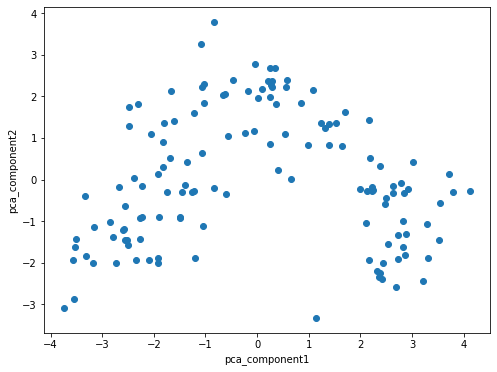

In [26]:
# 라벨 미적용 주성분 분석 데이터
# 라벨이 적용되지 않은(타겟 데이터가 없는) 경우에는 각 데이터가 어떤 와인 클래스를 나타내는지 알 수 없다.
plt.figure(figsize=[8, 6]) # 차트 크기를 지정한다.
plt.scatter(X_tn_pca_df['pca_comp1'], X_tn_pca_df['pca_comp2'], marker='o') # 산포도를 그린다.
plt.xlabel('pca_component1') # x축 이름을 설정한다.
plt.ylabel('pca_component2') # y축 이름을 설정한다.
plt.show()

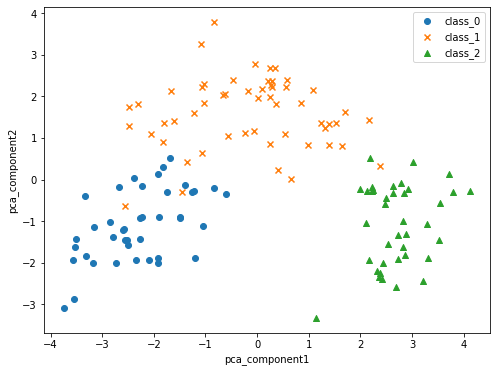

In [41]:
# 라벨 적용 주성분 분석 데이터
df = X_tn_pca_df
plt.figure(figsize=[8, 6])

# 클래스별로 데이터를 분할한다.
df_0 = df[df['target'] == 0]
df_1 = df[df['target'] == 1]
df_2 = df[df['target'] == 2]

# 클래스별로 분할된 데이터의 첫 번째 주성분 벡터를 추출한다.
X_11 = df_0['pca_comp1']
X_12 = df_1['pca_comp1']
X_13 = df_2['pca_comp1']

# 클래스별로 분할된 데이터의 두 번째 주성분 벡터를 추출한다.
X_21 = df_0['pca_comp2']
X_22 = df_1['pca_comp2']
X_23 = df_2['pca_comp2']

# 타겟 이름을 지정한다. 와인 데이터를 구분할 것이므로 와인 종류에 해당되는 세 가지 이름이 타겟 이름이 된다.
target_0 = raw_wine.target_names[0]
target_1 = raw_wine.target_names[1]
target_2 = raw_wine.target_names[2]

# 산포도를 그린다.
plt.scatter(X_11, X_21, marker='o', label=target_0)
plt.scatter(X_12, X_22, marker='x', label=target_1)
plt.scatter(X_13, X_23, marker='^', label=target_2)

plt.xlabel('pca_component1')
plt.ylabel('pca_component2')
plt.legend()
plt.show()

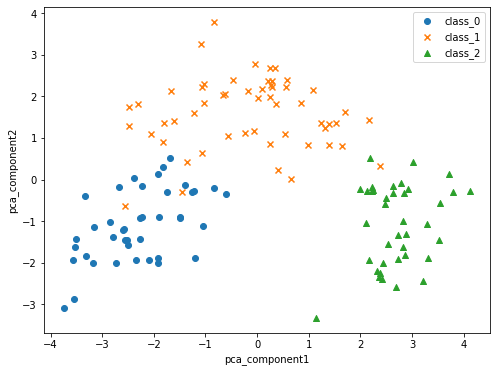

In [43]:
# 라벨 적용 주성분 분석 데이터 - 반복문 사용
df = X_tn_pca_df
markers = ['o', 'x', '^'] # 시각화에 사용할 마커를 지정한다.
plt.figure(figsize=[8, 6])

# enumerate() 함수는 (인덱스, 데이터) 형태의 튜플을 리턴한다.
for index, marker in enumerate(markers):
    df_index = df[df['target'] == index] # 시각화할 와인 데이터를 얻어온다.
    target_index = raw_wine.target_names[index] # 시각화할 와인의 타겟 이름을 얻어온다.
    X1 = df_index['pca_comp1'] # 시각화할 차원 축소된 데이터의 첫 번째 주성분 벡터를 얻어온다.
    X2 = df_index['pca_comp2'] # 시각화할 차원 축소된 데이터의 두 번째 주성분 벡터를 얻어온다.
    plt.scatter(X1, X2, marker=marker, label=target_index) # 산포도를 그린다.
# =====

plt.xlabel('pca_component1')
plt.ylabel('pca_component2')
plt.legend()
plt.show()

주성분 분석 적용 전 데이터 학습

In [45]:
from sklearn.ensemble import RandomForestClassifier # 랜덤 포레스트 알고리즘을 사용하기 위해 import 한다.
clf_rf = RandomForestClassifier(max_depth=2, random_state=0) # 랜덤 포레스트 모델 객체를 만든다.
# 표준화된 피쳐 데이터 X_tn_std와 트레이닝 타겟 데이터 y_tn을 넣어서 랜덤 포레스트 알고리즘을 학습시킨다.
clf_rf.fit(X_tn_std, y_tn)
pred_rf = clf_rf.predict(X_te_std) # 표준화된 테스트 데이터 X_te_std로 예측한다.
print(pred_rf)

[2 1 0 1 0 2 1 0 2 1 0 0 1 0 1 1 2 0 1 0 0 1 2 0 0 2 0 0 0 2 1 2 2 0 1 1 1
 1 1 0 0 1 2 0 0]


In [46]:
from sklearn.metrics import accuracy_score # 모형 정확도를 평가하기 위해 import 한다.
# accuracy_score() 함수의 인수로 실제 타겟 데이터와 예측된 데이터를 넘겨 정확도를 평가한다.
accuracy = accuracy_score(y_te, pred_rf)
print(accuracy)

0.9777777777777777


주성분 분석 적용 후 데이터 학습

In [48]:
from sklearn.ensemble import RandomForestClassifier # 랜덤 포레스트 알고리즘을 사용하기 위해 import 한다.
clf_rf_pca = RandomForestClassifier(max_depth=2, random_state=0) # 랜덤 포레스트 모델 객체를 만든다.
# 표준화된 피쳐 데이터 X_tn_std와 트레이닝 타겟 데이터 y_tn을 넣어서 랜덤 포레스트 알고리즘을 학습시킨다.
clf_rf_pca.fit(X_tn_pca, y_tn)
pred_rf_pca = clf_rf_pca.predict(X_te_pca) # 표준화된 테스트 데이터 X_te_std로 예측한다.
print(pred_rf_pca)

[2 1 0 1 0 2 1 0 2 1 0 0 1 0 1 1 2 0 1 0 0 1 0 0 0 2 0 0 0 2 1 2 2 0 1 1 1
 1 1 0 0 1 2 0 0]


In [49]:
from sklearn.metrics import accuracy_score # 모형 정확도를 평가하기 위해 import 한다.
# accuracy_score() 함수의 인수로 실제 타겟 데이터와 예측된 데이터를 넘겨 정확도를 평가한다.
accuracy = accuracy_score(y_te, pred_rf_pca)
print(accuracy)

0.9555555555555556
